In [2]:
%matplotlib inline
import importlib
import utils2; importlib.reload(utils2)
from utils2 import *

Using TensorFlow backend.
/home/flend/anaconda3/envs/pytorch/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import torch_utils; importlib.reload(torch_utils)
from torch_utils import *

In [9]:
def show(img, fs=(6,6)):
    plt.figure(figsize = fs)
    plt.imshow(np.transpose((img/2+0.5).clamp(0,1).numpy(), (1,2,0)), interpolation='nearest')

In [10]:
def save(img, filename):
    plt.figure()
    plt.imsave(filename, np.transpose((img/2+0.5).clamp(0,1).numpy(), (1,2,0)))

In [11]:
def create_noise(b): 
    return Variable(FT(b, nz, 1, 1).cuda().normal_(0, 1))

In [12]:
# Fixed noise used just for visualizing images when done
bs,sz,nz = 64,64,100
fixed_noise = create_noise(bs)

Running code from hash 2525199b0eb7e257b45e032dc2bb5724b8f6a0c9

In [35]:
epoch = 5999

/home/flend/anaconda3/envs/pytorch/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'dcgan.DCGAN_G' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


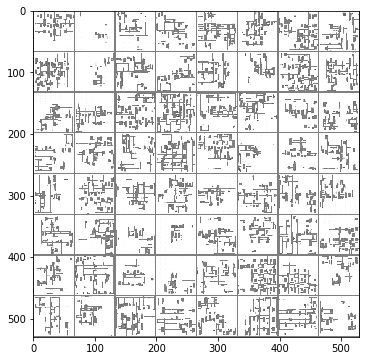

In [36]:
checkpoint = torch.load(str.format("digger_weights/gen_epoch_{}.pt", epoch))
fake = checkpoint(fixed_noise).data.cpu()
show(vutils.make_grid(fake))
save(vutils.make_grid(fake), str.format("digger_gen_grid_epoch{}.png", epoch))

In [37]:
for i in range(0, 20):
    save(vutils.make_grid(fake[i:i+1,:,:,:]), str.format("digger_gen_epoch{}.png", i))

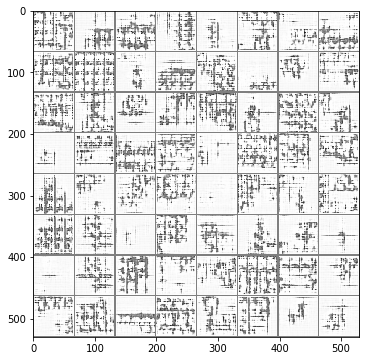

In [17]:
checkpoint = torch.load("digger_weights/gen_epoch_2000.pt")
fake = checkpoint(fixed_noise).data.cpu()
show(vutils.make_grid(fake))

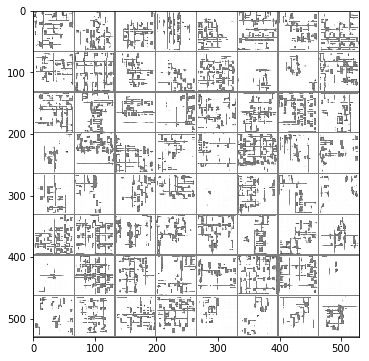

In [18]:
checkpoint = torch.load("digger_weights/gen_epoch_4000.pt")
fake = checkpoint(fixed_noise).data.cpu()
show(vutils.make_grid(fake))

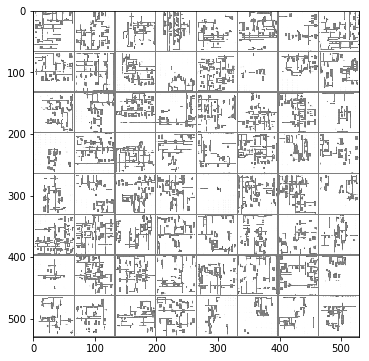

In [19]:
checkpoint = torch.load("digger_weights/gen_epoch_5999.pt")
fake = checkpoint(fixed_noise).data.cpu()
show(vutils.make_grid(fake))

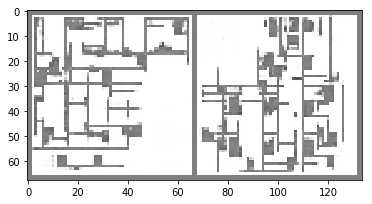

In [20]:
fake_reduced = fake[0:2,:,:,:]
fake_reduced.size()
show(vutils.make_grid(fake_reduced))

6000 iterations took about 4 hrs
Clearly it takes around 4000 iterations to even get close to the right idea
I would like to try with a 1/0 activate function for the final image
Also other generator improvements from the course